In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
with open('../webscraping/data/gute_frage_1600875979316.json') as json_file:
    data = json.load(json_file)
    data = json.loads(data)
print(len(data))
question_num = 0
answer_num = 0
for d in data:
    question_num += 1
    answer_num += len(d['answers'])

57288


In [3]:
print(answer_num)
print(question_num)
print(answer_num/question_num)

215222
57288
3.7568426197458455


In [4]:
df = pd.DataFrame(data, columns =['question', 'answers', 'question_text', 'url', 'points'])  
df

,question,answers,question_text,url,points
0,Leihwagen kaputt - muss ich es bezahlen?,[Das ist ganz sicher nicht rechtens. Ihr müsst...,"Ich habe bei einer Autowerkstatt, wo mein Auto...",https://www.gutefrage.net/frage/leihwagen-kapu...,"[0, 0, 0, 0, 0]"
1,Guten Morgen - Habt ihr eine Patientenverfügun...,[Habe auch einen Organspendeausweis - auch wic...,"Guten Morgen ihr Lieben! Krankheit, Leiden, St...",https://www.gutefrage.net/frage/guten-morgen--...,"[0, 0, 0]"
2,Razzia gegen illegale Leiharbeit in der Fleisc...,[Können wir nicht erstmal an so kleinen rechts...,Aufgrund des Verdachts der Einschleusung von i...,https://www.gutefrage.net/frage/razzia-gegen-i...,"[1, 4, 0, 1, 1]"
3,fristose Kündigung Mietvertrag?,[Wenn du die Miete direkt vom Jobcenter erhält...,Ich habe meinem Mieter wegen Zahlungsrückständ...,https://www.gutefrage.net/frage/fristose-kuend...,[0]
4,Attest gegen Maske vs Kündigung?,[1. Das Attest Trägt der Mitarbeiter eine Saue...,"Hallo, wie verhält sich eigentlich folgender F...",https://www.gutefrage.net/frage/attest-gegen-m...,"[0, 1, 0, 1, 0]"
...,...,...,...,...,...
57283,Springt die private Haftpflicht bei Mietwagen ...,[In der privaten Haftpflichtversicherung sind ...,"Hallo, mal angenommen ich fahre mit car2go, ba...",https://www.gutefrage.net/frage/springt-die-pr...,"[unk, unk, 1, unk, unk]"
57284,Beihilfe berechtigt - was bekommt mein Arbeitg...,"[Hallo makkeeeh, nein dein Arbeitgeber erfährt...","Hallo, bekommt mein Arbeitgeber etwas mit, wen...",https://www.gutefrage.net/frage/beihilfe-berec...,"[unk, unk, 2, unk, unk]"
57285,Darf ich alle Clash Royale Bilder auf meiner C...,"[einfach im clash royal forum mal fragen, Lieb...","Hallo liebes Forum Ich frage mich, ob ich für ...",https://www.gutefrage.net/frage/darf-ich-alle-...,"[0, unk]"
57286,"Ist es eine Beleidigung, wenn man zu seine Fra...","[Eine Beleidigung wäre es erst dann, wenn du j...","Hallo! Ich war vor wenigen Stunden beim Kiosk,...",https://www.gutefrage.net/frage/ist-es-eine-be...,"[1, 2, 1, 2]"


In [5]:
df["answer_num"] = df["answers"].apply(lambda answers:len(answers))
df["answer_lens"] = df["answers"].apply(lambda answers: [len(answer) for answer in answers])
df["answer_lens_sum"] = df["answer_lens"].apply(lambda lens: sum(lens))

In [6]:
df["question_len"] = df["question"].apply(lambda question: len(question))
df["question_text_len"] = df["question_text"].apply(lambda question_text: len(question_text))

In [13]:
df = df[df["answer_num"] != 0]

In [14]:
answer_lens = [answer_len for answer_lens in df["answer_lens"].values for answer_len in answer_lens]

In [15]:
import matplotlib.pyplot as plt
def plot_hist(data, bins, x_label="", y_label=""):
    plt.figure(num=None, figsize=(10, 10), facecolor='w', edgecolor='k')

    plt.hist(data, bins=bins, edgecolor="k")
    plt.xticks(bins)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [16]:
def print_stats(data):
    print("Mean", np.mean(data))
    print("Max", np.max(data))
    print("Min", np.min(data))
    print("Std", np.std(data))

In [17]:
print("Answer length characteristics:")
print_stats(answer_lens)

Answer length characteristics:
Mean 335.7353430411389
Max 26474
Min 0
Std 395.0151664629946


In [20]:
df[df["answer_lens"] == []]

ValueError: Lengths must match to compare

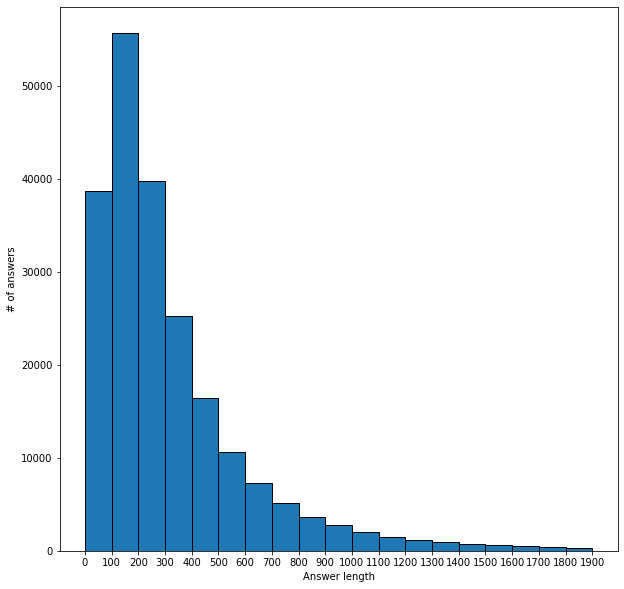

In [21]:
plot_hist(answer_lens, list(range(0, 2000, 100)), x_label="Answer length", y_label="# of answers")

In [22]:
question_lens = df['question_len']
print("Question length characteristics:")
print_stats(question_lens)

Question length characteristics:
Mean 53.90757901412917
Max 160
Min 5
Std 28.424864552630556


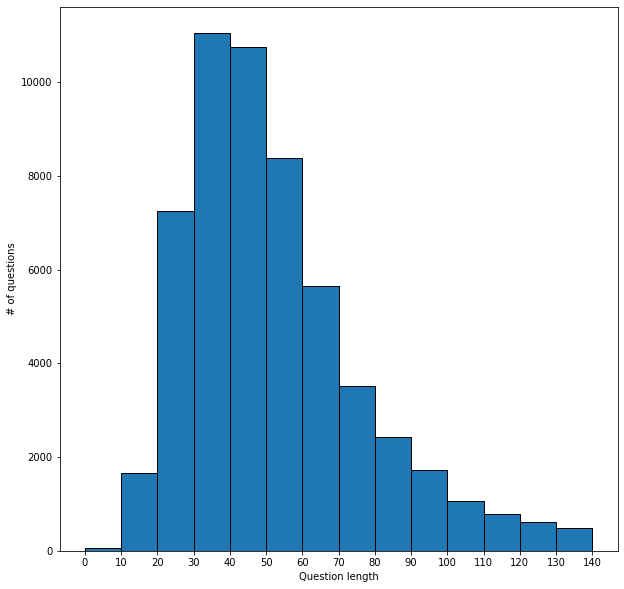

In [23]:
bins = list(range(0, 150, 10))
plot_hist(question_lens.values, bins, x_label="Question length", y_label="# of questions")

In [24]:
question_text_lens = df['question_text_len']
print("Question text length characteristics:")
print_stats(question_text_lens)

Question text length characteristics:
Mean 503.069289313273
Max 3000
Min 0
Std 454.67409731336704


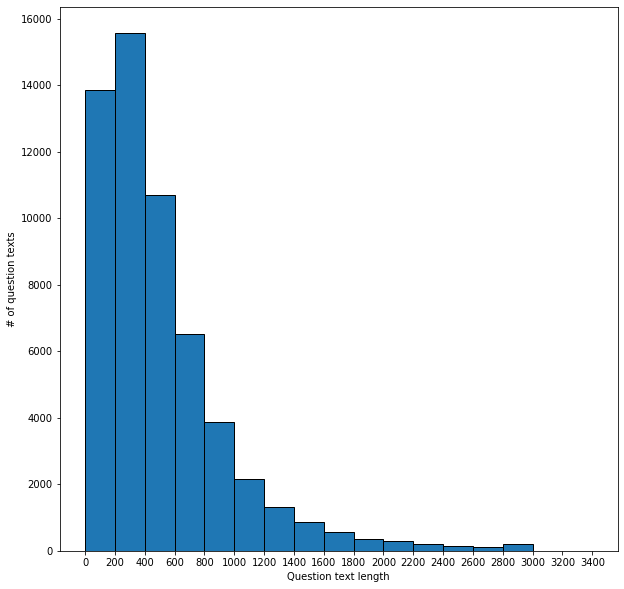

In [25]:
bins = list(range(0, 3500, 200))
plot_hist(question_text_lens.values, bins, x_label="Question text length", y_label="# of question texts")